# Evaluation metrics
The main evaluation metrics for **classification** are
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under the ROC curve (AUC)
- Log loss
- Precision at k (P@k)
- Average precision at k (AP@k)
- Mean average precision at k (MAP@k)

The main evaluation metrics for **regression** are
- Mean absolute error (MAE)
- Mean squared error (MSE)
- Root mean squared error (RMSE)
- Root mean squared logarithmic error (RMSLE)
- Mean percentage error (MPE)
- Mean absolute percentage error (MAPE)
- R-squared ($R^2$)

## Binary and multi-class classification metrics

The 4 possible outcomes intersecting predictions and ground-truths in a binary classification problem
- True Positives (TP)
- True Negatives (TN)
- False Positives (FP)
- False Negatives (FN)

### Accuracy
Accuracy defines how accurate your model is, which means how many predictions where correct over the whole dataset.
$$\text{Accuracy}=\frac{TP+TN}{TP+TN+FP+FN}$$

In [2]:
from sklearn.metrics import accuracy_score

y_true = [1,1,1,1,1,0,0,0,0,1]
y_pred = [1,1,1,1,1,1,1,0,0,0]

accuracy_score(y_true,y_pred)

0.7

$$TP=5 \quad TN=2 \quad FP=2 \quad FN=1$$
$$\text{Accuracy}=\frac{TP+TN}{TP+TN+FP+FN}=\frac{5+3}{5+3+2+1}=0.7$$

The main problem of accuracy is that, if the dataset is heavily imbalanced, the model might completely ignore the minority class, and keep obtaining an high accuracy value. That's generally a bad outcome, since the minority class usually is the "interesting" one, that is the one the user would like to correctly classify.

In [3]:
from sklearn.metrics import accuracy_score

y_true = [1,1,1,1,1,1,1,1,1,0]
y_pred = [1,1,1,1,1,1,1,1,1,1]

accuracy_score(y_true,y_pred)

0.9

### Precision
Precision represents the ability of the classifier not to label as positive a sample that is negative.
$$\text{Precision}=\frac{TP}{TP+FP}$$

In case of a **binary classification**, one class is considered "positive" and the precision is computed only for this class. That's the default behaviour of scikit-learn.

In [4]:
from sklearn.metrics import precision_score

y_true = [1,1,1,1,1,0,0,0,0,1]
y_pred = [1,1,1,1,1,1,1,0,0,0]

precision_score(y_true, y_pred, pos_label=1, average='binary')

0.7142857142857143

$$TP=5 \quad TN=2 \quad FP=2 \quad FN=1$$
$$\text{Precision}=\frac{TP}{TP+FP}=\frac{5}{5+2}=0.71$$

In case of a **multiclass classification**, different approaches are possible:
- micro averaged precision
- macro averaged precision
- weighted averaged precision

#### Micro averaged precision
Micro averaged precision is calculated considering the overall TP and TN, summing together TP and TN of each class

In [5]:
from sklearn.metrics import precision_score

y_true = [2,1,1,1,0,0,0,0,0,1]
y_pred = [2,2,1,1,1,1,1,0,0,0]

precision_score(y_true, y_pred, average='micro')

0.5

$$TP_{2}=1 \quad FP_{2}=1$$
$$TP_{1}=2 \quad FP_{1}=3$$
$$TP_{0}=2 \quad FP_{0}=1$$

$$TP=TP_{2}+TP_{1}+TP_{0}=1+2+2=5$$
$$FP=FP_{2}+FP_{1}+FP_{0}=1+3+1=5$$
$$\text{Precision}=\frac{TP}{TP+FP}=\frac{5}{5+5}=0.5$$

#### Macro averaged precision
Macro averaged precision is calculated computing the precision for each class, and then averaging the precisions

In [6]:
from sklearn.metrics import precision_score

y_true = [2,1,1,1,0,0,0,0,0,1]
y_pred = [2,2,1,1,1,1,1,0,0,0]

precision_score(y_true, y_pred, average='macro')

0.5222222222222223

$$N_{classes}=3$$

$$TP_{2}=1 \quad FP_{2}=1$$
$$TP_{1}=2 \quad FP_{1}=3$$
$$TP_{0}=2 \quad FP_{0}=1$$

$$\text{Precision}_{2}=\frac{TP_{2}}{TP_{2}+FP_{2}}=\frac{1}{1+1}=\frac{1}{2}$$
$$\text{Precision}_{1}=\frac{TP_{1}}{TP_{1}+FP_{1}}=\frac{2}{2+3}=\frac{2}{5}$$
$$\text{Precision}_{0}=\frac{TP_{0}}{TP_{0}+FP_{0}}=\frac{2}{2+1}=\frac{2}{3}$$

$$\text{Precision}=\frac{\text{Precision}_{2}+\text{Precision}_{1}+\text{Precision}_{0}}{N_{classes}}=\frac{\frac{1}{2}+\frac{2}{5}+\frac{2}{3}}{3}=0.522$$

#### Weighted averaged precision
Weighted averaged precision is calculated computing the precision for each class (as macro averaged precision), and then computing a weighted average of the precisions

In [7]:
from sklearn.metrics import precision_score

y_true = [2,1,1,1,0,0,0,0,0,1]
y_pred = [2,2,1,1,1,1,1,0,0,0]

precision_score(y_true, y_pred, average='weighted')

0.5433333333333333

$$N_{samples}=10$$
$$N_{2}=1 \quad w_{2}=N_{2}/N_{samples}=1/10$$
$$N_{1}=4 \quad w_{1}=N_{1}/N_{samples}=4/10$$
$$N_{0}=5 \quad w_{0}=N_{0}/N_{samples}=5/10$$

$$TP_{2}=1 \quad FP_{2}=1$$
$$TP_{1}=2 \quad FP_{1}=3$$
$$TP_{0}=2 \quad FP_{0}=1$$

$$\text{Precision}_{2}=\frac{TP_{2}}{TP_{2}+FP_{2}}=\frac{1}{1+1}=\frac{1}{2}$$
$$\text{Precision}_{1}=\frac{TP_{1}}{TP_{1}+FP_{1}}=\frac{2}{2+3}=\frac{2}{5}$$
$$\text{Precision}_{0}=\frac{TP_{0}}{TP_{0}+FP_{0}}=\frac{2}{2+1}=\frac{2}{3}$$

$$\text{Precision}=w_{2}*\text{Precision}_{2}+w_{1}*\text{Precision}_{1}+w_{0}*\text{Precision}_{0}=\frac{1}{10}*\frac{1}{2}+\frac{4}{10}*\frac{2}{5}+\frac{5}{10}*\frac{2}{3}=0.543$$

### Recall
Recall represents the ability of the classifier to find all the positive samples.
$$\text{Recall}=\frac{TP}{TP+FN}$$

In case of a binary classification, one class is considered "positive" and the recall is computed only for this class. That's the default behaviour of scikit-learn.

In [8]:
from sklearn.metrics import recall_score

y_true = [1,1,1,1,1,0,0,0,0,1]
y_pred = [1,1,1,1,1,1,1,0,0,0]

recall_score(y_true, y_pred, pos_label=1, average='binary')

0.8333333333333334

$$TP=5 \quad TN=2 \quad FP=2 \quad FN=1$$
$$\text{Recall}=\frac{TP}{TP+FN}=\frac{5}{5+1}=0.83$$

In case of a **multiclass classification**, different approaches are possible:
- micro averaged recall
- macro averaged recall
- weighted averaged recall

#### Micro averaged recall
Micro averaged recall is calculated considering the overall TP and FN, summing together TP and TN of each class

In [9]:
from sklearn.metrics import recall_score

y_true = [2,1,1,1,0,0,0,0,0,1]
y_pred = [2,2,1,1,1,1,1,0,0,0]

recall_score(y_true, y_pred, average='micro')

0.5

$$TP_{2}=1 \quad FN_{2}=0$$
$$TP_{1}=2 \quad FN_{1}=2$$
$$TP_{0}=2 \quad FN_{0}=3$$

$$TP=TP_{2}+TP_{1}+TP_{0}=1+2+2=5$$
$$FN=FN_{2}+FN_{1}+FN_{0}=0+2+3=5$$
$$\text{Recall}=\frac{TP}{TP+FN}=\frac{5}{5+5}=0.5$$

#### Macro averaged recall
Macro averaged recall is calculated computing the recall for each class, and then averaging the recalls

In [10]:
from sklearn.metrics import recall_score

y_true = [2,1,1,1,0,0,0,0,0,1]
y_pred = [2,2,1,1,1,1,1,0,0,0]

recall_score(y_true, y_pred, average='macro')

0.6333333333333333

$$N_{classes}=3$$

$$TP_{2}=1 \quad FN_{2}=0$$
$$TP_{1}=2 \quad FN_{1}=2$$
$$TP_{0}=2 \quad FN_{0}=3$$

$$\text{Recall}_{2}=\frac{TP_{2}}{TP_{2}+FN_{2}}=\frac{1}{1+0}=\frac{1}{1}$$
$$\text{Recall}_{1}=\frac{TP_{1}}{TP_{1}+FN_{1}}=\frac{2}{2+2}=\frac{2}{4}$$
$$\text{Recall}_{0}=\frac{TP_{0}}{TP_{0}+FN_{0}}=\frac{2}{2+3}=\frac{2}{5}$$

$$\text{Recall}=\frac{\text{Recall}_{2}+\text{Recall}_{1}+\text{Recall}_{0}}{N_{classes}}=\frac{\frac{1}{1}+\frac{2}{4}+\frac{2}{5}}{3}=0.633$$

#### Weighted averaged recall
Weighted averaged recall is calculated computing the recall for each class (as macro averaged recall), and then computing a weighted average of the recalls

In [11]:
from sklearn.metrics import recall_score

y_true = [2,1,1,1,0,0,0,0,0,1]
y_pred = [2,2,1,1,1,1,1,0,0,0]

recall_score(y_true, y_pred, average='weighted')

0.5

$$N_{samples}=10$$
$$N_{2}=1 \quad w_{2}=N_{2}/N_{samples}=1/10$$
$$N_{1}=4 \quad w_{1}=N_{1}/N_{samples}=4/10$$
$$N_{0}=5 \quad w_{0}=N_{0}/N_{samples}=5/10$$

$$TP_{2}=1 \quad FN_{2}=0$$
$$TP_{1}=2 \quad FN_{1}=2$$
$$TP_{0}=2 \quad FN_{0}=3$$

$$\text{Recall}_{2}=\frac{TP_{2}}{TP_{2}+FN_{2}}=\frac{1}{1+0}=\frac{1}{1}$$
$$\text{Recall}_{1}=\frac{TP_{1}}{TP_{1}+FN_{1}}=\frac{2}{2+2}=\frac{2}{4}$$
$$\text{Recall}_{0}=\frac{TP_{0}}{TP_{0}+FN_{0}}=\frac{2}{2+3}=\frac{2}{5}$$

$$\text{Recall}=w_{2}*\text{Recall}_{2}+w_{1}*\text{Recall}_{1}+w_{0}*\text{Recall}_{0}=\frac{1}{10}*\frac{1}{1}+\frac{4}{10}*\frac{2}{4}+\frac{5}{10}*\frac{2}{5}=0.5$$

### Precision-recall curve
Most of the models, for each data point, do not actually predict a class, rather they predict a probability of belonging to a class. It's up to the user to decide the probability threshold based on which a data point is considered part of a class or not. Then, given a threshold, precision and recall will accordingly change. At this point it is useful to visualize how they change based on different thresholds: the precision-recall value pairs obtained changing the threshold is called precision-recall curve.

In [12]:
from sklearn.metrics import precision_recall_curve

y_true = [1,1,1,1,0,0,0,0,0,1]
y_pred_prob = [.6,.7,.8,.9,.7,.6,.5,.2,.1,.3]

precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred_prob)

print(precisions)
print(recalls)
print(thresholds)

[0.625      0.57142857 0.66666667 0.75       1.         1.
 1.        ]
[1.  0.8 0.8 0.6 0.4 0.2 0. ]
[0.3 0.5 0.6 0.7 0.8 0.9]


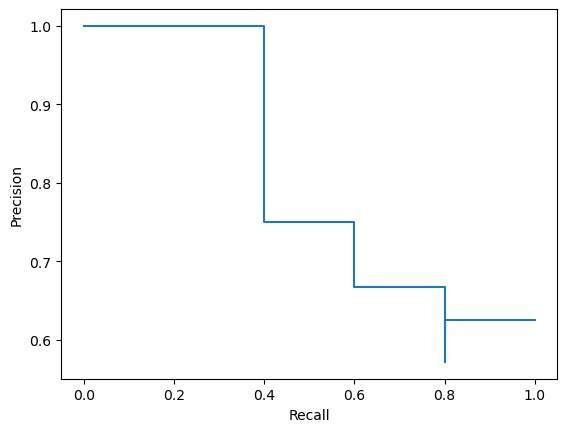

In [13]:
from sklearn.metrics import PrecisionRecallDisplay

pr_display = PrecisionRecallDisplay(precisions,recalls).plot()

These plots show the trade-off between precision and recall: maximizing one means minimizing the other.

### F1 score
Since a trade-off between precision and recall must be found, a compound metric come into help, that is the F1 score. The F1 score is defined as a weighted average (in particular, a **harmonic mean**) between precision and recall.
$$\text{F1}=\frac{2*\text{Precision}*\text{Recall}}{\text{Precision}+\text{Recall}}=\frac{2*TP}{2*TP+FP+FN}$$

In case of a **binary classification**, one class is considered "positive" and the precision is computed only for this class. That's the default behaviour of scikit-learn.

In [14]:
from sklearn.metrics import f1_score

y_true = [1,1,1,1,1,0,0,0,0,1]
y_pred = [1,1,1,1,1,1,1,0,0,0]

f1_score(y_true, y_pred)

0.7692307692307692

$$TP=5 \quad TN=2 \quad FP=2 \quad FN=1$$
$$\text{Precision}=\frac{TP}{TP+FP}=\frac{5}{5+2}=0.71$$
$$\text{Recall}=\frac{TP}{TP+FN}=\frac{5}{5+1}=0.83$$
$$\text{F1}=\frac{2*\text{Precision}*\text{Recall}}{\text{Precision}+\text{Recall}}=\frac{2*0.71*0.83}{0.71+0.83}=0.76$$

In case of a **multiclass classification**, different approaches are possible:
- micro averaged f1 score
- macro averaged f1 score
- weighted averaged f1 score

These methods follow what said concerning the analogous precision and recall approaches.

### ROC curve and AUC
- **True positive rate** (TPR): sensitivity; same as recall
- **False positive rate** (FPR): type I error rate. In terms of the courtroom example, a type I error corresponds to convicting an innocent defendant, i.e. considering him guilty (positive) insted of innocent (the default, negative).
- **True negative rate** (TNR): specificity
- **False negative rate** (FPR): type II error rate. In terms of the courtroom example, a type II error corresponds to acquitting a criminal, i.e. considering him innocent (the default, negative) insted of guilty (positive).

Similarly to what's done with the precision-recall curve, it is interesting to compute the **Receiver Operating Characteristic** (ROC), that is composed of value-pairs of TPR and FPR considering different values for the threshold.

In [15]:
from sklearn.metrics import roc_curve

y_true = [1,1,1,1,0,0,0,0,0,1]
y_pred_prob = [.6,.7,.8,.9,.7,.6,.5,.2,.1,.3]

fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_pred_prob,pos_label=1)

print(tpr)
print(fpr)
print(thresholds)

[0.  0.2 0.4 0.8 0.8 1.  1. ]
[0.  0.  0.  0.4 0.6 0.6 1. ]
[1.9 0.9 0.8 0.6 0.5 0.3 0.1]


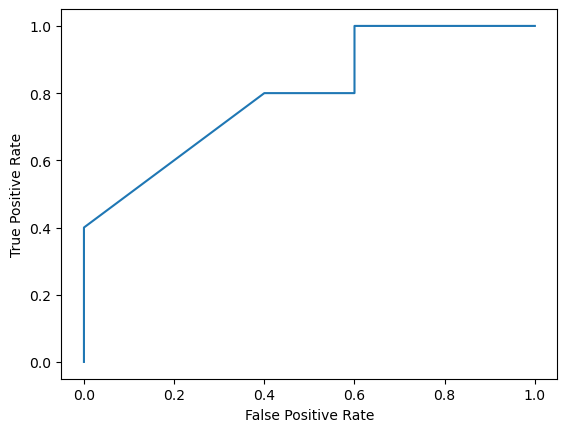

In [16]:
from sklearn.metrics import RocCurveDisplay

pr_display = RocCurveDisplay(tpr=tpr,fpr=fpr).plot()

Looking at the example plot, the best threshold seems to be $0.6$: it corresponds to a good trade-off between the TPR maximization ($TPR=0.8$) and the FPR minimization ($FPR=0.4$).

This curve is very informative: if the curve on the diagonal, it means that the values predicted by the estimator are of the same quality as they would be if they were randomly drawn from a uniform distribution.

A metric that more concisely hints the same information is the **Area Under the Curve** (AUC). Indeed, if the area below the curve equal to $0.5$, then the predicted values are of the same quality as they would be if they were randomly drawn from a uniform distribution. 

In general, AUC allows to assess how a model is good
- AUC close to $1$: the model is perfect (maybe to good to be true)
- AUC close to $0.5$: 
- AUC close to $0$: the model is awful, but actually is perfect (maybe to good to be true); indeed, if AUC=$0$, this means that the parameters are so bad, that they can be substituted with their opposite and have the a perfect model

In [18]:
from sklearn.metrics import roc_auc_score

y_true = [1,1,1,1,0,0,0,0,0,1]
y_pred_prob = [.6,.7,.8,.9,.7,.6,.5,.2,.1,.3]

roc_auc_score(y_true, y_pred_prob)

0.8

### Log loss
Log loss is used in case of binary classification, and uses as input the ground truth $y$ (`y_true`, the *target*) and the prediction probabilities $p$ (`y_pred_prob`). It penalizes for very wrong predictions: it punishes being very sure but wrong.
$$\text{log loss}=-y*\log{(p)-(1-y)*\log{(1-p)}}$$
Notice that the equation is computed on a single sample, to compute the log loss of an entire dataset just calculate the log loss of each single sample and then take the average.

Obviously, since it is a loss, it measures the distance between the ground truth and the predictions, so the smaller the better.

A great advantage of using log loss is that it is a derivable function, unlike previous metrics.

Results with correct and sure predictions 

In [21]:
from sklearn.metrics import log_loss

y_true = [1,1,1,1,1,0,0,0,0,0]
y_pred_prob = [.9,.9,.9,.9,.9,.1,.1,.1,.1,.1]

log_loss(y_true, y_pred_prob)

0.1053605156578263

$$N_{samples}=10$$
$$\text{for } i \text{ in } [0,4]: \quad \text{log loss}_{i}=-y_i*\log{(p_i)-(1-y_i)*\log{(1-p_i)}}=-1*\log{(0.9)-(1-1)*\log{(1-0.9)}}=-\log{(0.9)}=0.105$$
$$\text{for } i \text{ in } [5,9]: \quad \text{log loss}_{i}=-y_i*\log{(p_i)-(1-y_i)*\log{(1-p_i)}}=-0*\log{(0.1)-(1-0)*\log{(1-0.1)}}=-\log{(0.9)}=0.105$$
$$\text{log loss}=\frac{\sum{\text{log loss}_{i}}}{N_{samples}}=\frac{0.105*10}{10}=0.105$$

Results with correct but unsure predictions 

In [26]:
from sklearn.metrics import log_loss

y_true = [1,1,1,1,1,0,0,0,0,0]
y_pred_prob = [.7,.7,.7,.7,.7,.3,.3,.3,.3,.3]

log_loss(y_true, y_pred_prob)

0.35667494393873245

### Confusion matrix
Confusion matrix summarizes the intersections between ground truth and predictions.

**Binary classification**

In [33]:
from sklearn.metrics import confusion_matrix

y_true = [1,1,1,1,1,0,0,0,0,1]
y_pred = [1,1,1,1,1,1,1,0,0,0]

conf_matr = confusion_matrix(y_true=y_true, y_pred=y_pred)

tn, fp, fn, tp = conf_matr.ravel()

print(f'tn: {tn}')
print(f'fp: {fp}')
print(f'fn: {fn}')
print(f'tp: {tp}')

tn: 2
fp: 2
fn: 1
tp: 5


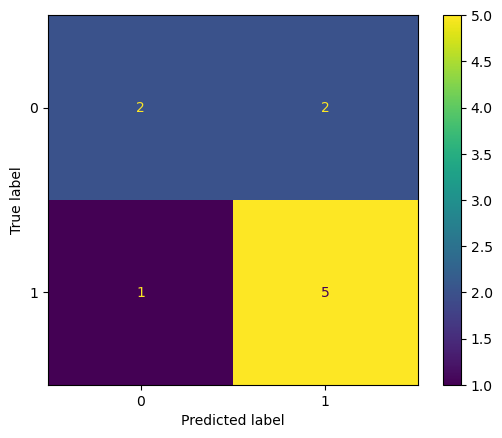

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(conf_matr).plot()

**Multi-class classification**

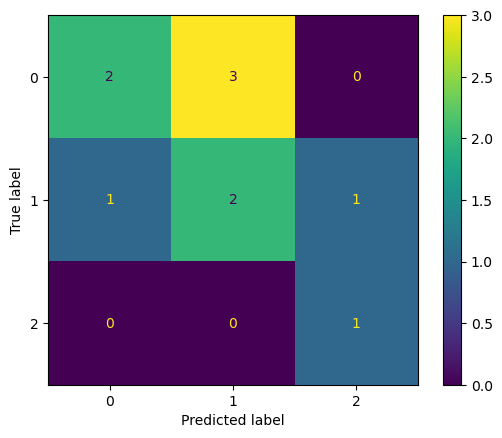

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_true = [2,1,1,1,0,0,0,0,0,1]
y_pred = [2,2,1,1,1,1,1,0,0,0]

cm_display = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()

## Classification metrics: multi-labels classification problems
In multi-label classification problems multiple classes can be associated to the same sample. So, now, the `y_true` and `y_pred` are lists of lists: each row corresponds to a sample, and each column corresponds to a predicted label for the sample.

### Precision at k (P@k)
Precision at k (P@k) returns how many relevant items are present in the top-k predicted items, i.e., how many predictions are correct among the first $k$ predictions. 

Notice that it works on a single sample: its inputs are the true and predicted labels for only one record in the dataset.

As of today, there is no implementation in scikit-learn, but it is quite simple to create a `pk` function that computes it.

In [38]:
def pk(y_true, y_pred, k):
    '''
    This function calculates precision at k for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :param k: the value of k
    :return: precision at a given value k
    '''
    # if k is 0 return 0
    if k == 0 : return 0

    # consider only top k predictions
    y_pred = y_pred[:k]

    pred_set = set(y_pred)
    true_set = set(y_true)

    return len(pred_set.intersection(true_set)) / len(y_pred)

In [50]:
y_true = [1,2,3]
y_pred = [2,4,6,3,1]

for k, _ in enumerate(y_pred):
    pk_value = pk(y_true, y_pred, k=k+1)
    print(f'k = {k+1}\tpk = {pk_value}')

k = 1	pk = 1.0
k = 2	pk = 0.5
k = 3	pk = 0.3333333333333333
k = 4	pk = 0.5
k = 5	pk = 0.6


### Average precision at k (AP@k)
Average precision at k (AP@k) is the average of multiple precision at k (P@k) computed on the same sample for different $k$ values, ranging from 1 to a maximum $k_{max}$ value.

As of today, there is no implementation in scikit-learn, but it is quite simple to create a `apk` function that computes it.

In [51]:
def apk(y_true, y_pred, k):
    '''
    This function calculates average precision at k for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :param k: maximum value of k to consider
    :return: average precision at a given value k
    '''

    if k == 0 : return 0

    pk_values = []

    for k_i in range(1,k+1):
        pk_values.append(pk(y_true, y_pred, k_i))

    return sum(pk_values) / len(pk_values)

In [56]:
y_true = [1,2,3]
y_pred = [2,4,6,3,1]

for k, _ in enumerate(y_pred):
    apk_value = apk(y_true, y_pred, k=k+1)
    print(f'k = {k+1}\tapk = {apk_value}')

k = 1	apk = 1.0
k = 2	apk = 0.75
k = 3	apk = 0.611111111111111
k = 4	apk = 0.5833333333333333
k = 5	apk = 0.5866666666666667


### Mean average precision at k (MAP@k)
Mean average precision at k (MAP@k) computes the mean, over different samples, of the average precision at k (AP@k), each one computed on a single sample. So, differently from P@k and AP@k, MAP@k takes as input a list of samples with the relative labels, not a single sample.

As of today, there is no implementation in scikit-learn, but it is quite simple to create a `mapk` function that computes it.

In [58]:
def mapk(y_true, y_pred, k):
    '''
    This function calculates average precision at k for a single sample
    :param y_true: list of list of values, actual classes
    :param y_pred: list of list of values, predicted classes
    :param k: maximum value of k to consider
    :return: mean average precision at a given value k
    '''

    if k == 0 : return 0

    apk_values = []

    for t,p in zip(y_true,y_pred):
        apk_values.append(apk(t,p,k))

    return sum(apk_values) / len(apk_values)

In [60]:
y_true = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

y_pred = [
    [1,3,5,2,4],
    [3,5,7,4,6],
    [7,9,11,8,10]
]

for k, _ in enumerate(y_pred[0]):
    mapk_value = mapk(y_true, y_pred, k=k+1)
    print(f'k = {k+1}\tmapk = {mapk_value}')

k = 1	mapk = 0.6666666666666666
k = 2	mapk = 0.75
k = 3	mapk = 0.6851851851851851
k = 4	mapk = 0.6805555555555555
k = 5	mapk = 0.6644444444444444


## Regression metrics
All regression metrics are based on the distance between the true value $y$ and the predicted value $\hat{y}$. That distance is called **error** $e$, and is mainly defined as follows
$$e=y-\hat{y}$$
So, for each sample $i$, it is possible to compute an error $e_i$.

There is also another common error formulation, that is the **log error**
$$\text{log error}=\log{(1+y)}-\log{(1+\hat{y})}=\log{\frac{(1+y)}{(1+\hat{y})}}$$
The metrics based on log error has some peculiar differences with metrics based on simple error $e$
- Metrics based on log error are more **robust to outlier**: a single outlier usually causes an explosion in simple error related metrics, while outliers have a much lower effect on log error related metrics.
- Metrics based on log error are related to **relative distance** between the predicted and true value, rather than to their absolute distance: as the previous formula shows, applying a logarithmic function to the predicted and true values transforms the meaning of the error, making it a ratio instead of an actual difference. Moreover, because of this, metrics based on log error are scale-invariant: the log error of $y=10$ and $\hat{y}=1$ is the same as of $y=100$ and $\hat{y}=10$.
- Metrics based on log error have a **biased penalty**: underestimation of the true value (i.e., $\hat{y}<y$) is more penalized than overestimation (i.e., $\hat{y}>y$).

However, to use metrics based on log error target values must contain only non-negative values. Concerning its usage scopes, from scikit-learn user guide:
> This metric is best to use when targets having exponential growth, such as population counts, average sales of a commodity over a span of years.

Main source about log error properties [here](https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a).

To show the different regression metrics, a simple linear regression model is fit.

0.8043599303955992


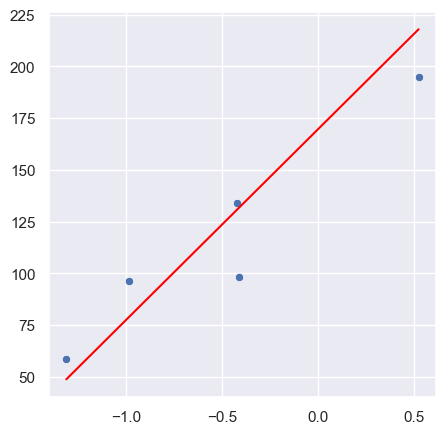

In [11]:
from sklearn.datasets import make_regression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

X,y = make_regression(n_samples=100,n_features=1,n_informative=1,noise=15)
y += np.abs(y.min()) # This value shift is done so that the targets are all positive, otherwise metrics based on log errors could not be computed
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=5,shuffle=True)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
y_true = y_test
score = regressor.score(X_test,y_test)

X_plot = pd.Series(X_test.ravel())
y_true_plot = pd.Series(y_test)
y_pred_plot = pd.Series(y_pred)

sns.set_theme()
fig, ax = plt.subplots(1,1,figsize=(5,5))
sns.scatterplot(x=X_test.ravel(),y=y_test,ax=ax)
sns.lineplot(x=X_test.ravel(),y=y_pred,ax=ax,color='red')
print(score)

### Mean absolute error (MAE)
Mean absolute error (MAE) is the mean of the absolute errors, each computed on a different sample.
$$\text{MAE}=\frac{1}{N}\sum^{N}_{i=1}{|e_i|}$$

In [8]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true,y_pred)

10.553395611613421

### Mean squared error (MSE)
Mean squared error (MSE) is the mean of the squared errors, each computed on a different sample.
$$\text{MSE}=\frac{1}{N}\sum^{N}_{i=1}{e_i^2}$$

In [9]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true,y_pred)

176.60889153702453

### Root mean squared error (RMSE)
Root mean squared error (RMSE) is the square root of the mean squared error (MSE)
$$\text{RMSE}=\sqrt{\text{MSE}}=\sqrt{\frac{1}{N}\sum^{N}_{i=1}{e_i^2}}$$

In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np

np.sqrt(mean_squared_error(y_true,y_pred))

20.323502857866504

### Mean squared logarithmic error (MSLE)
Mean squared logarithmic error (MSLE) is the mean of the squared logarithmic error (SLE).
$$\text{MSLE}=\frac{1}{N}\sum_{i=1}^N\text{SLE}_i=\frac{1}{N}\sum_{i=1}^N{(\log{(1+y_i)}-\log{(1+\hat{y}_i)})^2}=\frac{1}{N}\sum_{i=1}^N{\log^{2}{\frac{(1+y_i)}{(1+\hat{y}_i)}}}$$

In [13]:
from sklearn.metrics import mean_squared_log_error

mean_squared_log_error(y_true,y_pred)

0.03343633663416247